In [157]:
## import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Leyendo el dataset

In [158]:
## read file

df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')

In [159]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [160]:
df = df.set_index('car_ID')

In [161]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [162]:
df.info

<bound method DataFrame.info of         symboling                   CarName fueltype aspiration doornumber  \
car_ID                                                                       
1               3        alfa-romero giulia      gas        std        two   
2               3       alfa-romero stelvio      gas        std        two   
3               1  alfa-romero Quadrifoglio      gas        std        two   
4               2               audi 100 ls      gas        std       four   
5               2                audi 100ls      gas        std       four   
...           ...                       ...      ...        ...        ...   
201            -1           volvo 145e (sw)      gas        std       four   
202            -1               volvo 144ea      gas      turbo       four   
203            -1               volvo 244dl      gas        std       four   
204            -1                 volvo 246   diesel      turbo       four   
205            -1               

In [163]:
df.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [164]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## 2. Limpiando el dataset

In [165]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [166]:
df.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [167]:
df['CarName']

car_ID
1            alfa-romero giulia
2           alfa-romero stelvio
3      alfa-romero Quadrifoglio
4                   audi 100 ls
5                    audi 100ls
                 ...           
201             volvo 145e (sw)
202                 volvo 144ea
203                 volvo 244dl
204                   volvo 246
205                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [168]:
df['CarName'].str.split(' ')

car_ID
1            [alfa-romero, giulia]
2           [alfa-romero, stelvio]
3      [alfa-romero, Quadrifoglio]
4                  [audi, 100, ls]
5                    [audi, 100ls]
                  ...             
201            [volvo, 145e, (sw)]
202                 [volvo, 144ea]
203                 [volvo, 244dl]
204                   [volvo, 246]
205                 [volvo, 264gl]
Name: CarName, Length: 205, dtype: object

In [169]:
df['CarName'] = df['CarName'].str.split(' ',expand=True)[0]
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [170]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [171]:
df.loc[df.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,


## 3. Visualisando los datos

In [172]:
num_col = df.select_dtypes(exclude = 'object').columns
num_col

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

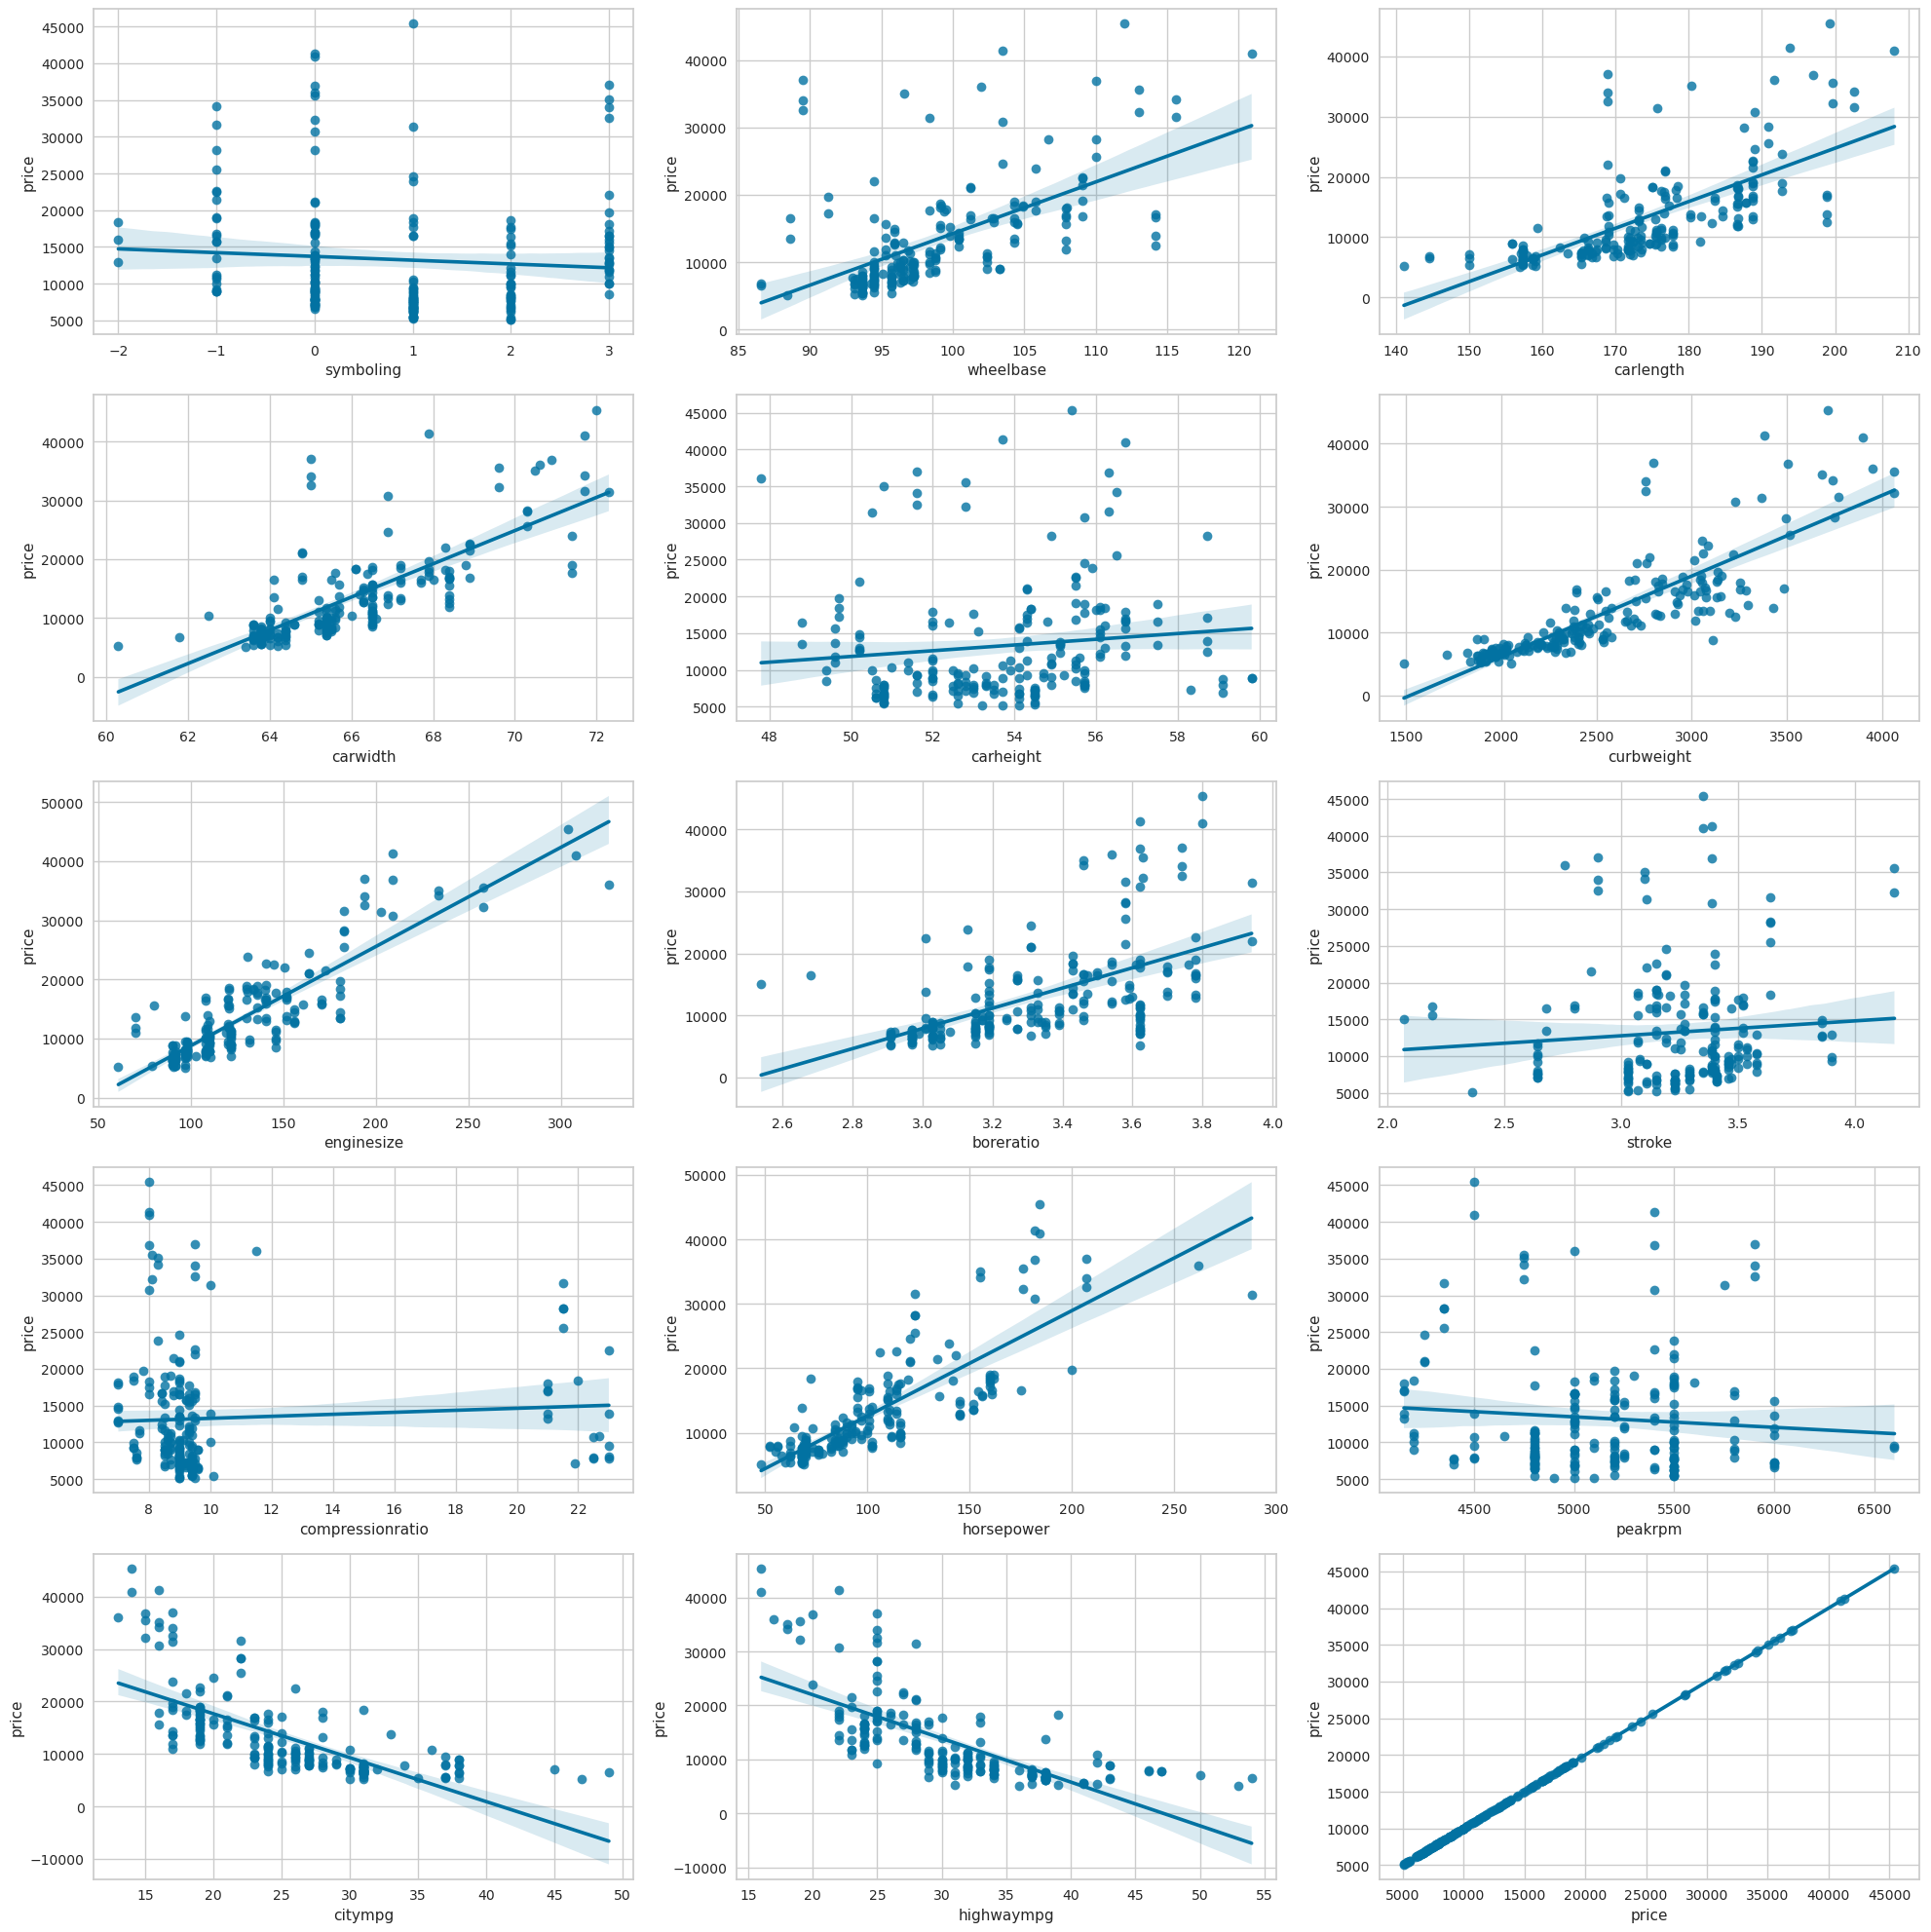

In [173]:
plt.figure(figsize=(20,20))
for i, j in enumerate(num_col):
    plt.subplot(5, 3, i+1)
    sns.regplot(x = j, y = 'price', data =df)
plt.tight_layout()    

De donde podemos ver a grandes rasgos, la relación lineal entre 'price' y: 
'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg'.

<Axes: >

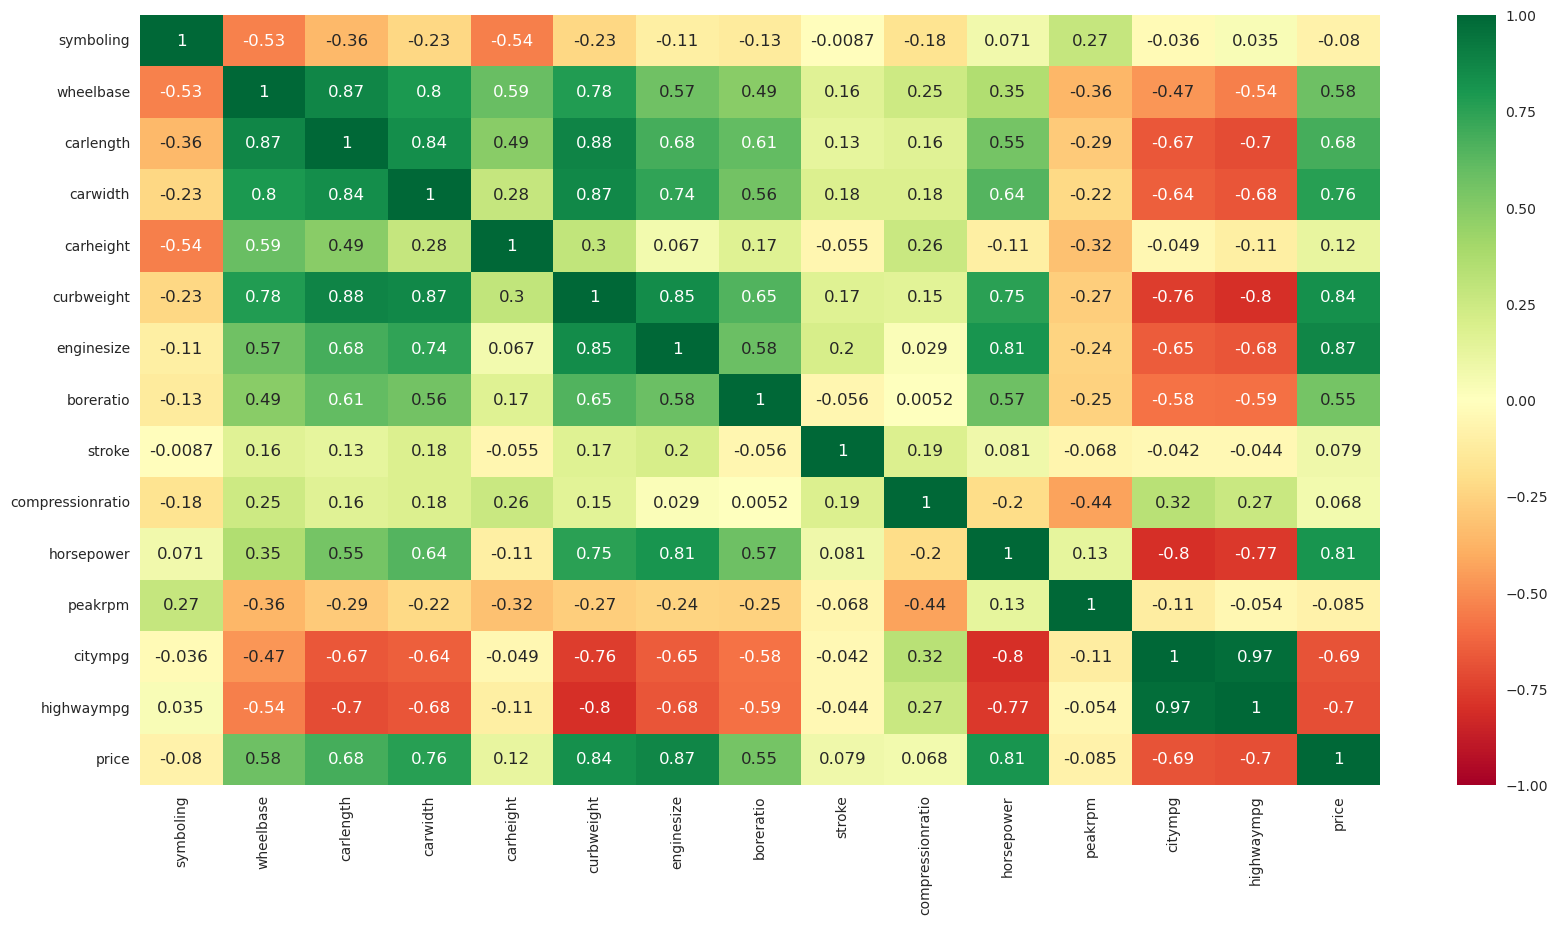

In [174]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[num_col].corr(), cmap = 'RdYlGn', vmin = -1, annot = True)

De donde podemos notar a grandes rasgos, una correlación entre 'price' y: 
'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg'.

In [175]:
#Tomamos solo las columnas relevantes para el precio  
price_var = df[['price', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg']]
price_var.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
car_ID,,,,,,,,,,
1,13495.0,88.6,168.8,64.1,2548,130,3.47,111,21,27
2,16500.0,88.6,168.8,64.1,2548,130,3.47,111,21,27
3,16500.0,94.5,171.2,65.5,2823,152,2.68,154,19,26
4,13950.0,99.8,176.6,66.2,2337,109,3.19,102,24,30
5,17450.0,99.4,176.6,66.4,2824,136,3.19,115,18,22


In [176]:
# from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# encoder = OrdinalEncoder()
# for i in price_var.select_dtypes(include = 'object').columns:
#     price_var[i] = encoder.fit_transform(price_var[[i]])
# price_var.head()

## 4. Preparando el dataset para las regresiones

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = price_var.drop('price', axis = 1)
y = price_var['price']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

In [178]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(164, 9) (164,) (41, 9) (41,)


In [179]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import HTML
def statistical_measurements(model, X_test,y_test):
    pred = model.predict(X_test)
    mse = mean_absolute_error(y_test, pred)
    rmse = mean_squared_error(y_test, pred, squared = False)
    r2 = r2_score(y_test, pred)
  
    table_data = [
        ['Error absoluto medio', f'{mse:.2f}'],
        ['Raíz del error cuadrático medio', f'{rmse:.2f}'],
        ['Coeficiente de determinación R-Cuadrado', f'{r2*100:.2f} %'],
    ]

    table_html = '<table><tr><th><center>Medida</center></th><th><center>Valor</center></th></tr>'
    for row in table_data:
        table_html += f'<tr><td><center>{row[0]}</center></td><td><center>{row[1]}</center></td></tr>'
    table_html += '</table>'

    display(HTML(table_html))

    

In [180]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

def model_plot(model,X_test,X_train,y_test,y_train):
    plt.figure(figsize=(20,8))
    pred_error = PredictionError(model)

    pred_error.fit(X_train, y_train)  
    pred_error.score(X_test, y_test)
    pred_error.show();

## 5. Aplicando regresión robusta

### 5.1 Regresión RANSAC

Medida,Valor
Error absoluto medio,3483.38
Raíz del error cuadrático medio,7087.57
Coeficiente de determinación R-Cuadrado,42.07 %


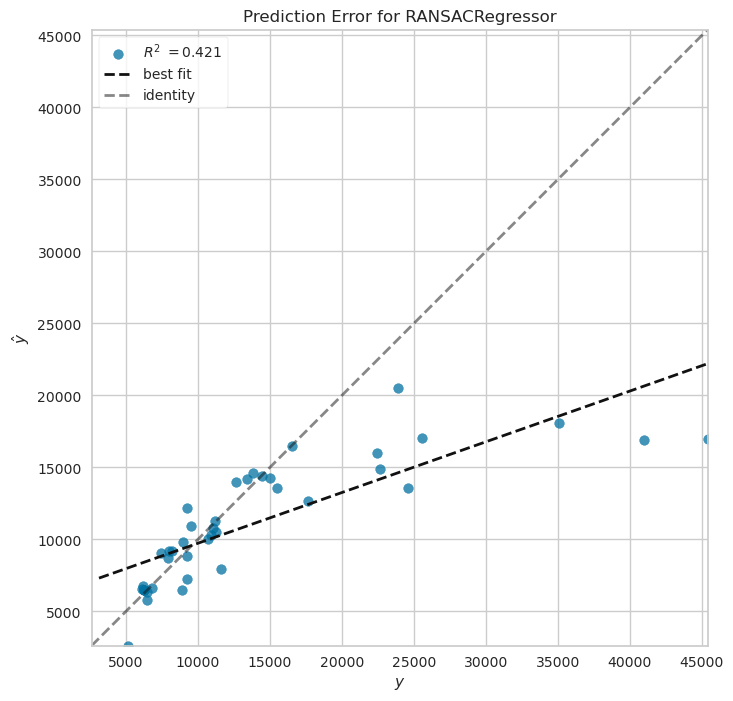

In [181]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor()
model.fit(X_train, y_train)
statistical_measurements(model, X_test, y_test)
model_plot(model,X_test,X_train,y_test,y_train)

In [182]:
# from sklearn.metrics import r2_score
# pred = model.predict(X_test)
# for i in range(0,100):
#     model = RANSACRegressor()
#     model.fit(X_train, y_train)
#     if (r2_score(y_test, pred) >= 0.5): 
#         statistical_measurements(model, X_test, y_test)
#         model_plot(model,X_test,X_train,y_test,y_train)
#         break

### 5.2 Regresión TheilSen

Medida,Valor
Error absoluto medio,2922.15
Raíz del error cuadrático medio,4904.18
Coeficiente de determinación R-Cuadrado,72.27 %


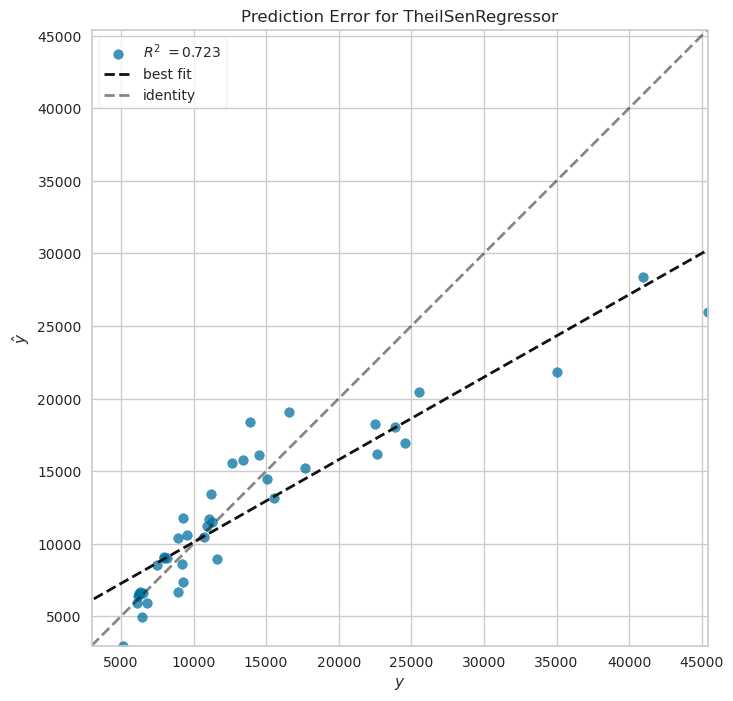

In [183]:
from sklearn.linear_model import TheilSenRegressor 

model = TheilSenRegressor()
model.fit(X_train, y_train)
statistical_measurements(model, X_test, y_test)
model_plot(model,X_test,X_train,y_test,y_train)

### 5.3 Regresión Huber 

Medida,Valor
Error absoluto medio,2625.70
Raíz del error cuadrático medio,3550.86
Coeficiente de determinación R-Cuadrado,85.46 %


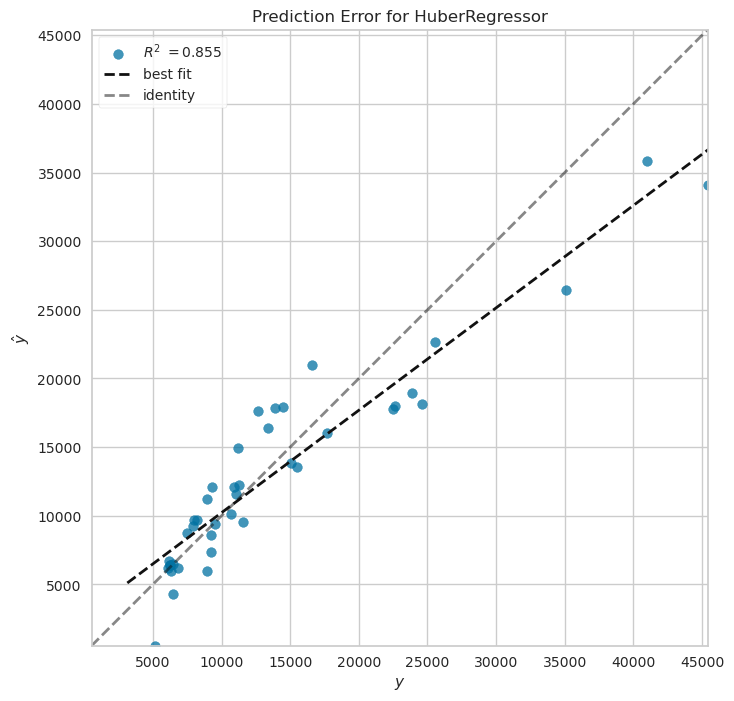

In [184]:
from sklearn.linear_model import HuberRegressor
model = HuberRegressor(epsilon=2.6)
model.fit(X_train, y_train)
statistical_measurements(model, X_test, y_test)
model_plot(model,X_test,X_train,y_test,y_train)